In [31]:
from transpile_benchy.interfaces.qasm_interface import QASMBench, RedQueen
from transpile_benchy.interfaces.abc_interface import MQTBench
from transpile_benchy.metrics.depth_metric import DepthMetric
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from mirror_gates.utilities import SubsMetric

In [32]:
N = 8
coupling_map = CouplingMap.from_line(N)
coupling_map = CouplingMap.from_heavy_hex(3)
filter_list = ["fredkin", "toffoli", "adder_n4"]
qasm_bench_m = QASMBench(size="small", filter_list=filter_list)
filter_list = [
    "\\bqaoa",
    "qft",
    "shor",
    "dj",
    "ae",
    "qgan",
    "qpeexact",
]  # , "grover-v-chain"]
mqt_bench = MQTBench(num_qubits=N, filter_list=filter_list)

In [33]:
# [print(x) for x in str(qasm_bench_m).split(',')]
# [print(x) for x in str(mqt_bench).split(',')]

In [34]:
# coupling_map = CouplingMap.from_grid(5, 5)
# coupling_map = CouplingMap.from_heavy_hex(5)
# filter_list = None
# qasm_bench_m = QASMBench(size="medium", filter_list=filter_list)
# # filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan", "qpe"]
# filter_list = ["None"]
# mqt_bench = MQTBench(num_qubits=24, filter_list=filter_list)

In [35]:
# from qiskit.circuit.library import CXGate, iSwapGate
# from qiskit.extensions import UnitaryGate
# from weylchamber import canonical_gate
# from transpile_benchy.interfaces.qiskit_interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# num_qubits = 8
# coupling_map = CouplingMap.from_line(num_qubits)
# # coupling_map = CouplingMap.from_grid(3, 3)


# def create_TwoLocal_function(
#     entanglement_blocks, entanglement_name, entanglement_type="full", reps=2
# ):
#     """Generates a function to create a TwoLocal object with given parameters"""

#     def TwoLocal_function(n_qubits):
#         return TwoLocal(n_qubits, "ry", entanglement_blocks, entanglement_type, reps)

#     TwoLocal_function.__name__ = (
#         # f"TwoLocal_{entanglement_type}_{entanglement_name}_{reps}reps"
#         f"TwoLocal-{entanglement_name}"
#     )
#     return TwoLocal_function


# def generate_interface_from_data(data, qubits_options):
#     """Generates a QiskitFunctionInterface from gate data and qubits options"""
#     gate, name = data
#     func = create_TwoLocal_function(gate, name)
#     return QiskitFunctionInterface(func, qubits_options)


# num_qubits_options = [num_qubits]  # Or any other options you'd like

# # Specify the gate blocks and their names
# entanglement_blocks_data = [
#     (CXGate(), r"$\texttt{CNOT}$"),
#     # (CXGate().power(1 / 2), r"$\sqrt{\texttt{CNOT}}$"),
#     (iSwapGate(), r"$\texttt{iSWAP}$"),
#     (iSwapGate().power(1 / 2), r"$\sqrt{\texttt{iSWAP}}$"),
#     (UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full()), r"$\texttt{ECP}$"),
# ]

# qiskit_functions_twolocal = [
#     generate_interface_from_data(data, num_qubits_options)
#     for data in entanglement_blocks_data
# ]

In [36]:
# # 5Q backend = provider.backend.ibmq_quito
# # 20Q backend = provider.backend.ibmq_mumbai
# from typing import Callable, List
# from transpile_benchy.interfaces.qiskit_interface import QiskitFunctionInterface

# N = 5
# num_qubits = [N]  # , 20, 24, 28, 32, 36]
# from qiskit.circuit.library import QFT, QuantumVolume

# coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)
# qiskit_functions_qft = [QiskitFunctionInterface(QFT, num_qubits)]
# qiskit_functions_qv = [QiskitFunctionInterface(QuantumVolume, num_qubits)]

In [37]:
import logging

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.INFO)
# transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

In [38]:
metrics = [DepthMetric(), SubsMetric()]

transpilers = [
    QiskitLevel3(coupling_map, cx_basis=True),
    SabreMS(coupling_map, cx_basis=True, parallel=False),
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, logger=transpile_benchy_logger, parallel=False),
]

In [39]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    # submodules=qiskit_functions_twolocal,
    # submodules=qiskit_functions_qft,
    submodules=[qasm_bench_m, mqt_bench],
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

INFO:transpile_benchy:Running benchmarks for circuits...
Running circuits for QASMBench:   0%|          | 0/3 [00:00<?, ?it/s]

Running circuits for MQTBench:  86%|████████▌ | 6/7 [44:16<07:22, 442.74s/it]


In [40]:
# TODO filter add to results tracking, # number of added SWAPs, # of CNS subs
# remove the results if qiskit adds 0 SWAPS (can't be improved)
# reduce to a set of ~8 circuits at ~16Q scale....

In [41]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: adder_n4                                 Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: ae                                       Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: dj                                       Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: fredkin_n3                               Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qaoa                                     Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qft                                      Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qftentangled                             Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qpeexact                                 Mean result: 0.000                     

In [42]:
benchmark.summary_statistics(metrics[0], transpilers[0], transpilers[1])

{'average_change': -20.686520976361773,
 'best_circuit': 'qftentangled',
 'worst_circuit': 'adder_n4',
 'percent_changes': {'adder_n4': 0.0,
  'fredkin_n3': -11.116308941238572,
  'toffoli_n3': -9.563819447813176,
  'ae': -31.763040684630266,
  'dj': -13.676557586430949,
  'qaoa': 0.0,
  'qft': -40.01362664116713,
  'qftentangled': -49.50607957697971,
  'qpeexact': -30.53925590899615}}

In [43]:
benchmark.summary_statistics(metrics[0], transpilers[2], transpilers[3])

{'average_change': -22.8641237603437,
 'best_circuit': 'qftentangled',
 'worst_circuit': 'adder_n4',
 'percent_changes': {'adder_n4': 0.0,
  'fredkin_n3': -22.830322625602857,
  'toffoli_n3': -9.962659367529278,
  'ae': -35.06816491128627,
  'dj': -15.335341634986221,
  'qaoa': 0.0,
  'qft': -39.10342643153108,
  'qftentangled': -49.5355020057536,
  'qpeexact': -33.941696866403944}}

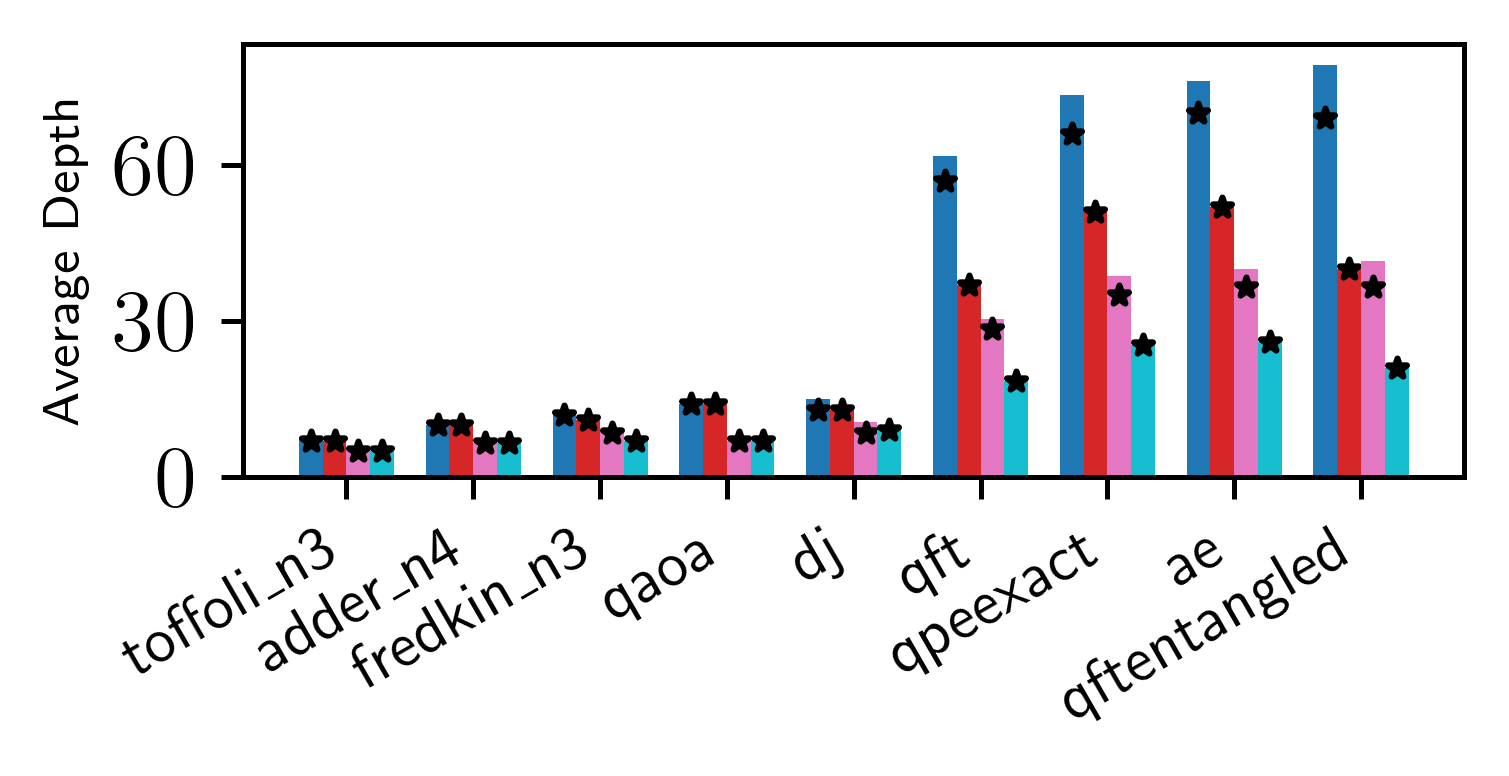

In [44]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=1, legend_show=0)

In [45]:
# from the literature
# toffoli
# fredkin
# EC codes
# Controlled phase
# QAOA
# Controlled phsae
# full entanling
# entanglemnt purification

# linaer, 2d, heavy-hex

# grover
# vqe
# bv
# qft
# qpe
# adder
# multipler
# sqn
# rd84
# co14
# sym9
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64
# toffoli
# fredkin
# adder
# qec_sm
# qec_en
# variational
# hs4
# shor
# pea
# error_correctiond3
# simons
# qaoa
# hhl
# dnn
# qpe
# ising

In [46]:
# benchmarks from NASSC
# from Qiskit, QASMBench, RevLib
# grover_n4
# grover_n6
# grover_n8
# vqe_n8
# vqe_n12
# bv_n19
# qft_n15
# qft_20
# qpe_n9
# adder_n10
# multiplier_n25
# sqn_n258 (?)
# rd84_n253
# co14_n215
# sym9_n193

In [47]:
# benchmarks from PAS+PAM
# from qiskit, supermarq (qaoa)
# adder63
# mul60
# qft5
# qft64
# grover5
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64